# Perceptron from scratch
<img src="perceptron_new.png">

The single-layer [Perceptron](https://en.wikipedia.org/wiki/Perceptron) is the simplest of the artificial neural networks (ANNs).  It was developed by American psychologist [Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt) in the 1950s.  

The Perceptron is a linear classifier used for binary predictions.  This means that in order for it to work, the data must be [linearly separable](https://en.wikipedia.org/wiki/Linear_separability).

Although the Perceptron is only applicable to linearly separable data, the more detailed [Multilayered Perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) can be applied to more complicated nonlinear datasets.  This includes applications in areas such as speech recognition, image processing, and financial predictions just to name a few.

<img src="linsep_new.png">
##How It Works
The perceptron works by "learning" a series of weights, corresponding to the input features.  These input features are vectors of the available data.  For example, if we were trying to classify whether an animal is a cat or dog, $x_1$ might be weight, $x_2$ might be height, and $x_3$ might be length.  Each pair of weights and input features is multiplied together, and then the results are summed.  If the summation is above a certain threshold, we predict one class, otherwise the prediction belongs to a different class.  For example, we could set the threshold at 0.  If the summation is greater than 0, the prediction is a 1 (dog), otherwise it's a 0 (cat).  

The final step is to check if our predictions were classified correctly.  If they were not, then the weights are updated using a learning rate.  This process continues for a certain number of iterations, known as "epochs."  The goal is to determine the weights that produce a linear decision boundary that correctly classifies the predictions.


##Perceptron Algorithm
The Perceptron is pretty straightforward.  Here's the basics:

1.  Initialize the weight vector $w$ , set a threshold $z$ for the activation function, number of time steps $t$ for computation, and a learning rate $\eta$.

2.  Calculate the output at the first iteration $n=1$ for the first training sample $i=1$ for the $k$ features:$$ f = \sum_{j=0}^k w^1_j x_{1j} = w^1_0 x_{10}+w^1_1 x_{11}+w^1_2 x_{12}+...+ w^1_k x_{1k} $$  $$\hat{y}^1_1 =\begin{cases}
    1 & \text{if }f \gt z\\
    0 & \text{otherwise}.
  \end{cases} $$  $$ $$
  
3.  Update the $k$ weights  
$$w^2_0 = w^1_0 + \eta [y_1-\hat{y}^1_1]x_{10}$$  $$ $$ 
$$w^2_1 = w^1_1 + \eta [y_1-\hat{y}^1_1]x_{11}$$  $$ $$ 
$$w^2_2 = w^1_2 + \eta [y_1-\hat{y}^1_1]x_{12}$$  
$$ \vdots $$
$$ w^2_k = w^1_k + \eta [y_1-\hat{y}^1_1]x_{1k} $$ $$ $$ 
4.  Increment the time-step to $n=n+1$.  If the final time-step $t$ hasn't been reached, go back to step 2., repeating the process for the next training sample $i$.  

It should be noted that this isn't exactly identical to Rosenblatt's original Perceptron, which used the $signum function$ for activation.$$ $$ $$sgn(f) =\begin{cases}
    1 & \text{if }f \gt 0\\
    -1 & \text{if }f \lt 0.
  \end{cases} $$ $$ $$
The form we'll be implementing allows us some flexibility in choosing a threshold for our activation function.  It also allows us to implement $1$ and $0$ for the outputs, which is typical for binary classification.

##Stochastic Gradient Descent
It's interesting to note that the Perceptron is identical to Stochastic Gradient Descent (SGD) on the following Sum-Of-Squared Error (SSE) loss function $J(w)$ where $y_i$ is the true output, $\hat{y}_i(w)$ is the predicted output, and $w$ is the weight: $$ J(w) = \sum_{i=1}^m{\frac{1}2(y_i-\hat{y}_i(w))^2}$$

We start by approximating the gradient at a single point $i$ using SGD:  

$$w^{n+1}_i = w^{n}_i - \eta \nabla J(w^n_i)$$

As with the Perceptron, $\eta$ is the learning rate, $i$ is a training sample, and $n$ is a given iteration.  We can reshape this by taking the partial derivative of the loss function at a particular training sample $i$ with respect to $w^n_i$.
$$ $$
$$\nabla J(w^n_i)=\frac{\partial J(w^n_i)}{\partial w^n_i}$$ $$ $$
$$=\frac{\partial }{\partial w^n_i} {\frac{1}2[y_i-\hat{y}^n_i(w^n_i)]^2} $$ $$ $$
$$=2\frac{1}2 [y_i-\hat{y}^n_i(w^n_i)]\frac{\partial }{\partial w^n_i} [{-\hat{y}^n_i}(w^n_i)]$$ $$ $$
$$=2\frac{1}2 [y_i-\hat{y}^n_i(w^n_i)]\frac{\partial }{\partial w^n_i} [{-w^n_i} x_{ij}]$$ $$ $$
$$={-[y_i-\hat{y}^n_i(w^n_i)]}x_{ij}$$ $$ $$


Now we can plug this back into the original SGD equation.

$$w^{n+1}_i = w^n_i - \eta [{-[y_i-\hat{y}^n_i(w^n_i)]}x_{ij}] $$ $$ $$
$$w^{n+1}_i = w^n_i + \eta [y_i-\hat{y}^n_i(w^n_i)]x_{ij} $$

If we plug in $n=1$ for the first iteration and $i=k$ for the $k^{th}$ training sample, then the form is identical to the Perceptron in the previous section.

$$w^2_k = w^1_k + \eta [y_1-\hat{y}^1_1]x_{1k}$$

Depending on the loss function used, SGD can take on many other forms.  For additional details about SGD using other loss functions and variations, [here is a good resource](https://en.wikipedia.org/wiki/Stochastic_gradient_descent). 

##Step-by-step Example
A good way to understand exactly how the Perceptron works is to walk through a simple example.  I'm going to use a [NAND gate](https://en.wikipedia.org/wiki/NAND_gate) model for my example, which has a very small linearly separable dataset.  Given the two features $x_1$ and $x_2$, here's what the outputs $y$ are for the NAND gate:

|$x_1$|$x_2$|$y$|
|:---:|:---:|:---:|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

If I break the features and output into column vectors, here's what they look like: $$ $$ $$  x_{i1} = \begin{bmatrix} x_{11}\\x_{21}\\x_{31}\\x_{41} \end{bmatrix} = \begin{bmatrix} 0\\0\\1\\1 \end{bmatrix}$$ $$ $$
$$x_{i2} = \begin{bmatrix} x_{12}\\x_{22}\\x_{32}\\x_{42} \end{bmatrix} = \begin{bmatrix} 0\\1\\0\\1 \end{bmatrix} $$ $$ $$
$$y_{i} = \begin{bmatrix} y_{1}\\y_{2}\\y_{3}\\y_{4} \end{bmatrix} = \begin{bmatrix} 1\\1\\1\\0 \end{bmatrix} $$

I'm also going to introduce a dummy feature $x_{i0}$ of ones, which will be used to calculate the [bias](https://stats.stackexchange.com/questions/185911/why-are-bias-nodes-used-in-neural-networks) term in the model.  The bias is an additional term that allows for flexibility in fitting the model.  It allows all input features to be $0$, while still being able to fit the model. $$ $$ $$ x_{i0} = \begin{bmatrix} x_{10}\\x_{20}\\x_{30}\\x_{40} \end{bmatrix} = \begin{bmatrix} 1\\1\\1\\1 \end{bmatrix} $$

Now I'm going to start working through the algorithm outlined above, step-by-step.

1.  I'm going to start by initializing the weight vector $w^n_i$ to zeros.  $$w^1_i = \begin{bmatrix} w^1_0\\w^1_1\\w^1_2 \end{bmatrix} = \begin{bmatrix} 0\\0\\0 \end{bmatrix}$$ $$ $$
I'm going to set the threshold $z=0$, the number of time steps to run the algorithm $t=50$, and the learning rate $\eta=0.1$.  Next I'm going to hop in to step 2. where the iterations begin.

2.  Calculate the output at the first iteration $n=1$ for the first training sample $i=1$. $$ f = \sum_{j=0}^2 w^1_j x_{1j} = w^1_0 x_{10}+w^1_1 x_{11}+w^1_2 x_{12}$$  $$ f = (0\cdot1) + (0\cdot0) + (0\cdot 0) = 0$$

    Now I'll make the actual prediction using my activation function.
$$\hat{y}^1_1 =\begin{cases}
    1 & \text{if }f \gt z\\
    0 & \text{otherwise}.
  \end{cases} $$
  $$\hat{y}^1_1=0$$
3.  Update the weights  
$$w^2_0 = w^1_0 + \eta [y_1-\hat{y}^1_1]x_{10} $$ $$ = 0 + 0.1[1-0]1 $$ $$= 0.1$$ $$ $$ 
$$w^2_1 = w^1_1 + \eta [y_1-\hat{y}^1_1]x_{11}$$  $$ = 0 + 0.1[1-0]0 $$ $$= 0$$ $$ $$
$$w^2_2 = w^1_2 + \eta [y_1-\hat{y}^1_1]x_{12}$$  $$ = 0 + 0.1[1-0]0 $$ $$= 0$$ $$ $$
$$ w^2_i = \begin{bmatrix}0.1\\0\\0\end{bmatrix}$$
4.  Increment the time step to $n=n+1$, therefore $n=2$.  Since the time step is not equal to 50, I jump back to step 2. and keep going.

Since there are four training samples, after going through four iterations I can evalualte the SSE loss function to see if the model has converged.  Looping through all of the training samples is also known as an "epoch."  Since my dataset has four training samples, there's four iterations in one epoch.  I won't write out all of the iterations, but you can find a spreadsheet where I did this by hand [here](https://github.com/jtsulliv/ML-from-scratch/tree/master/Neural-Networks) .  Based on my settings for threshold and learning rate, you should find that the model has converged after sixteen iterations, or four epochs, with these final weights:$$ $$  $$ w^n_i = \begin{bmatrix} w^n_0\\w^n_1\\w^n_2 \end{bmatrix} = \begin{bmatrix} 0.2\\-0.2\\-0.1 \end{bmatrix} $$

##Python Implementation from Scratch

In this section I'm going to implement the NAND model in Python.  This makes the Perceptron accessible to larger more complex datasets that a spreadsheet may not be able to handle.

I'm going to be taking advantage of the [Numpy](http://www.numpy.org/) library to simplify some of the math operations, and the [Matplotlib](https://matplotlib.org/) library for plotting.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

Next I'll enter in my feature data and the outputs.

In [2]:
# NAND gate features
# note: x0 is a dummy variable for the bias term
#     x0  x1  x2
x = [[1., 0., 0.],                                  
     [1., 0., 1.],                                 
     [1., 1., 0.],                                  
     [1., 1., 1.]] 


# Desired outputs
y = [1.,                                            
     1.,                                            
     1.,                                            
     0.] 

Here is the full implementation of the perceptron function, where $z$ is the threshold, $eta$ is the learning rate, and $t$ is the number of iterations.

In [3]:
# Training the Perceptron
#
# x:   feature data 
# y:   outputs 
# z:   threshold
# eta: learning rate
# t:   number of iterations

def perceptron_train(x, y, z, eta, t):
    
    # Initializing parameters for the Perceptron
    w = np.zeros(len(x[0]))        # weights 
    n = 0                          
    
    # Initializing additional parameters to compute SSE
    yhat_vec = np.ones(len(y))     # vector for predictions
    errors = np.ones(len(y))       # vector for errors (actual - predictions)
    J = []                         # vector for the SSE cost function
     
        
    while n < t:                                  
        for i in xrange(0, len(x)):                 
            
            # summation step
            f = np.dot(x[i], w)                      
                        
            # activation function
            if f > z:                               
                yhat = 1.                               
            else:                                   
                yhat = 0. 
            yhat_vec[i] = yhat                              
        
            # updating the weights
            for j in xrange(0, len(w)):             
                w[j] = w[j] + eta*(y[i]-yhat)*x[i][j]
                
            n += 1     

        
        # computing the sum-of-squared errors
        for i in xrange(0,len(y)):     
           errors[i] = (y[i]-yhat_vec[i])**2
        J.append(0.5*np.sum(errors))
           
    # function returns the weight vector, and sum-of-squared errors        
    return w, J


z = 0.0     # threshold
eta = 0.1   # learning rate
t = 50      # number of iterations

print "The weights are:"
print perceptron_train(x, y, z, eta, t)[0], "\n"

print "The sum-of-squared erros are:"
print perceptron_train(x, y, z, eta, t)[1]

The weights are:
[ 0.2 -0.2 -0.1] 

The sum-of-squared erros are:
[1.0, 1.5, 1.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


The weights are identical to those from the spreadsheet calculations.  Another useful tool is to plot the error as a function of the epochs.

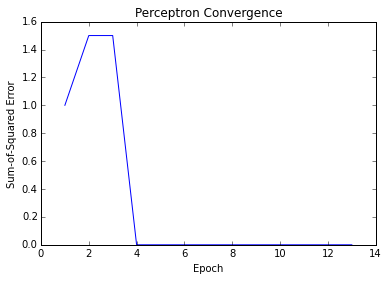

In [4]:
J = perceptron_train(x, y, z, eta, t)[1]     # pulling out the sum-of-squared errors from the tuple
epoch = np.linspace(1,len(J),len(J))

%matplotlib inline  
plt.plot(epoch, J)
plt.xlabel('Epoch')
plt.ylabel('Sum-of-Squared Error')
plt.title('Perceptron Convergence')
    

I can see from the results that by the fourth epoch the results have converged.  This is also consistent with the results from the spreadsheet.  

I set the threshold and weights arbitrarily, so these are things that I can investigate.  If I change the learning rate, say to 0.5, the weights and number of epochs to convergence change.

The weights are:
[ 1.5 -1.  -0.5] 

The sum-of-squared erros are:
[1.0, 1.5, 1.5, 1.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


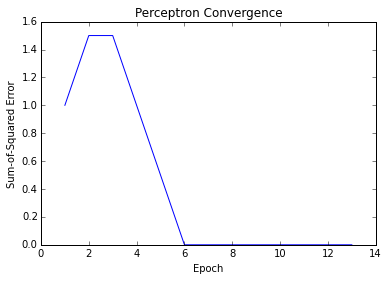

In [5]:
eta = 0.5     # new learning rate
z = 0.0

print "The weights are:"
print perceptron_train(x, y, z, eta, t)[0], "\n"

J = perceptron_train(x, y, z, eta, t)[1]
epoch = np.linspace(1,len(J),len(J))
print "The sum-of-squared erros are:"
print J

%matplotlib inline
plt.plot(epoch, J)
plt.xlabel('Epoch')
plt.ylabel('Sum-of-Squared Error')
plt.title('Perceptron Convergence')

I can also investigate the threshold.  Here is what the results look like using the original learning rate of 0.1, and changing the threshold to 0.5.

The weights are:
[ 0.8 -0.2 -0.1] 

The sum-of-squared erros are:
[1.5, 1.5, 1.5, 1.0, 1.5, 1.5, 1.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0]


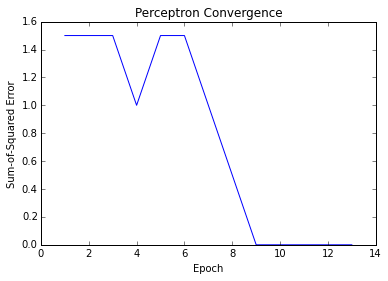

In [6]:
eta = 0.1     
z = 0.5     # new threshold

print "The weights are:"
print perceptron_train(x, y, z, eta, t)[0], "\n"

J = perceptron_train(x, y, z, eta, t)[1]
epoch = np.linspace(1,len(J),len(J))
print "The sum-of-squared erros are:"
print J

%matplotlib inline
plt.plot(epoch, J)
plt.xlabel('Epoch')
plt.ylabel('Sum-of-Squared Error')
plt.title('Perceptron Convergence')

This model performed slightly worse than the previous two, so maybe I don't want to use these paramaters.  

It's important to keep in mind that I'm only using a training set in this example.  I haven't actually made predictions on a test set hidden from the model.  Training and making predictions on the same dataset isn't a good idea, as it can lead to overfitting.  In the next section I'll work through another example where I split the data into a training set and a test set.

##A More Detailed Example

In this section I'm going to use a larger data set to train/test my Perceptron.  I'll also compare my results with an implementation from [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) as a validation of my model.  

###Synthetic Dataset
In order to test my Perceptron for comparison with the scikit-learn implementation, I'm going to first create a dataset.  Since I'll be plotting the intercept, I'm going to put in a dummy feature in the first column, which will be ones.  This way the model will learn the weights for the features, as well as the bias term for the intercept.

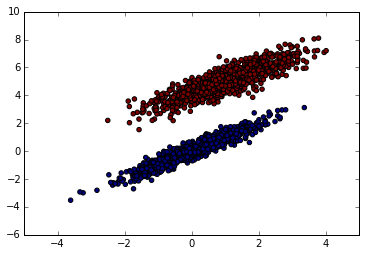

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

# setting the random seed to reproduce results
np.random.seed(5)

# number of observations
obs = 1000

# generating synthetic data from multivariate normal distribution  
class_zeros = np.random.multivariate_normal([0,0], [[1.,.95],[.95,1.]], obs)
class_ones = np.random.multivariate_normal([1,5], [[1.,.85],[.85,1.]], obs)

# generating a column of ones as a dummy feature to create an intercept
intercept = np.ones((2*obs,1))

# vertically stacking the two classes 
features = np.vstack((class_zeros, class_ones)).astype(np.float32)

# putting in the dummy feature column
features = np.hstack((intercept, features))

# creating the labels for the two classes
label_zeros = np.zeros((obs,1))
label_ones = np.ones((obs,1))

# stacking the labels, and then adding them to the dataset
labels = np.vstack((label_zeros,label_ones))
dataset = np.hstack((features,labels))

# scatter plot to visualize the two classes (red=1, blue=0)
plt.scatter(features[:,1], features[:,2], c = labels)

### Splitting the Dataset 
I didn't split the data in the NAND example into training and test sets because I was just illustrating a simple example of the Perceptron algorithm.  In this example I'm going to randomly sample 70% of the dataset for the training set, and predictions will be made on the remaining 30%.  Splitting the dataset into training and test sets is good practice to try and avoid overfitting.

In [8]:
# shuffling the data to make the sampling random
np.random.shuffle(dataset)

# splitting the data into train/test sets
train = dataset[0:(0.7*(obs*2))]
test = dataset[(0.7*(obs*2)):(obs*2)]

### Training the Model

The next step is to train the model to determine the weights.

In [9]:
# Training the Perceptron
#
# Inputs
# x:   feature data
# y:   outputs 
# z:   threshold
# eta: learning rate
# t:   number of iterations

# reshaping the data for the function
x_train = train[:,0:3]
y_train = train[:,3]

x_test = test[:,0:3]
y_test = test[:,3]


def perceptron_train(x, y, z, eta, t):
    
    # Initializing parameters for the Perceptron
    w = np.zeros(len(x[0]))        # initial weights 
    n = 0                          
    
    # Initializing additional parameters to compute sum-of-squared errors
    yhat_vec = np.ones(len(y))     # vector for predictions
    errors = np.ones(len(y))       # vector for errors (actual - predictions)
    J = []                         # vector for the SSE cost function
     
        
    while n < t:                             
        for i in xrange(0, len(x)):                 
            
            # summation step
            f = np.dot(x[i], w)          
            
            # activation function
            if f >= z:                               
                yhat = 1.                               
            else:                                   
                yhat = 0.
            yhat_vec[i] = yhat 
            
            # updating the weights
            for j in xrange(0, len(w)):             
                w[j] = w[j] + eta*(y[i]-yhat)*x[i][j]
   
        n += 1

        # computing the sum-of-squared errors
        for i in xrange(0,len(y)):     
           errors[i] = (y[i]-yhat_vec[i])**2
        J.append(0.5*np.sum(errors))
     
    return w, J


z = 0.0     # threshold
eta = 0.1   # learning rate
t = 5       # number of iterations

perceptron_train(x_train, y_train, z, eta, t)

w = perceptron_train(x_train, y_train, z, eta, t)[0]
J = perceptron_train(x_train, y_train, z, eta, t)[1]
epoch = np.linspace(1,len(J),len(J))

print "The weights are:"
print w
print "The sum-of-squared errors are:"
print J

The weights are:
[-0.7        -0.43283606  0.42203522]
The sum-of-squared errors are:
[5.5, 0.0, 0.0, 0.0, 0.0]


A plot of the model's convergence is also useful.

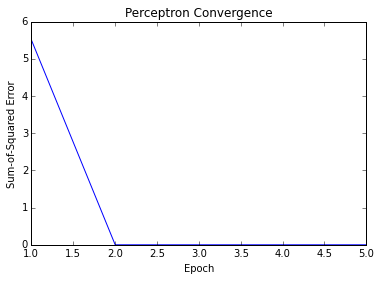

In [10]:
# plotting SSE as a function of epoch
J = perceptron_train(x_train, y_train, z, eta, t)[1]
epoch = np.linspace(1,len(J),len(J))

plt.figure(1)
plt.plot(epoch, J)
plt.xlabel('Epoch')
plt.ylabel('Sum-of-Squared Error')
plt.title('Perceptron Convergence')

###Testing the Model
Next, we'll be testing the model.  

In [11]:
from sklearn.metrics import accuracy_score

w = perceptron_train(x_train, y_train, z, eta, t)[0]


def perceptron_test(x, w, z, eta, t):
    y_pred = []
    for i in xrange(0, len(x-1)):
        f = np.dot(x[i], w)   

            # activation function
        if f > z:                               
            yhat = 1                               
        else:                                   
            yhat = 0 
        y_pred.append(yhat)
    return y_pred
        
y_pred = perceptron_test(x_test, w, z, eta, t)

print accuracy_score(y_test, y_pred)


1.0


We can see that the model performed perfectly.  Since this is a pretty simple, linearly separable dataset, this isn't surprising.  Lets take a look at what the decision boundary looks like for this model.

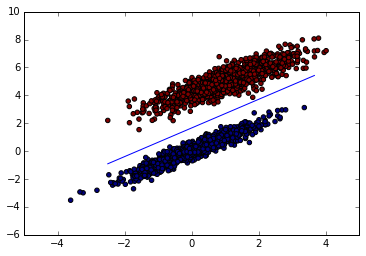

In [12]:
# plot the decision boundary
# 0 = w0x0 + w1x1 + w2x2
# x2 = (-w0x0-w1x1)/w2

min = np.min(x_test[:,1])
max = np.max(x_test[:,1])
x1 = np.linspace(min,max,100)

def x2(x1, w):
    w0 = w[0]
    w1 = w[1]
    w2 = w[2]
    x2 = []
    for i in xrange(0, len(x1-1)):
        x2_temp = (-w0-w1*x1[i])/w2
        x2.append(x2_temp)
    return x2
    
x_2 = np.asarray(x2(x1,w))

plt.scatter(features[:,1], features[:,2], c = labels)
plt.plot(x1, x_2)

The plot of the decision boundary confirms that the model has clearly separated the two classes.

### Scikit-learn Model

Based on the decision boundary, it looks like the model is working.  Another good check is to verify it with a trusted implementation from [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).  To compare the models, I'll take a look at the weights for each model.

In [13]:
from sklearn.linear_model import Perceptron

# training the sklearn Perceptron
clf = Perceptron(random_state=None, eta0= 0.1, shuffle=False, fit_intercept=False)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

print "sklearn weights:"
print clf.coef_[0]

print "my perceptron weights:"
print w

sklearn weights:
[-0.7        -0.43283606  0.42203522]
my perceptron weights:
[-0.7        -0.43283606  0.42203522]


The scikit-learn implementation yielded identical weights to my model.  This isn't surprising given the clear separability of the two datasets.  

I did have to manipulate a few details in the scikit-learn model though.  I turned off the random state and the shuffle option so that the scikit-learn Perceptron would use the same random seed that I set for my model.  I also set the learning rate to the same number as my perceptron.  Finally, I turned of the fit_intercept option.  Since I included the dummy column of ones in the dataset, I'm automatically fitting the intercept, so I don't need this option turned on.

## Conclusion
In this article I built a Perceptron model from scratch in Python.  Compared to the scikit-learn implementation, my model yielded identical results.  In a real life problem would I use my model over something from scikit-learn? Probably not.  My model is not nearly as optimized or robust as the scikit-learn implementation.  The real value in building a model from scratch is gaining a deeper understanding of how an algorithm actually works.  Understanding the underlying assumptions and limitations is extremely important when applying a machine learning model.